### Broadening Linear Regression

- Polynomial Features
- Cross-Validation
- GridSearch
- Pipeline

In [1]:
from sklearn.datasets import make_regression

In [7]:
X, y = make_regression(n_features = 10)

In [8]:
import matplotlib.pyplot as plt

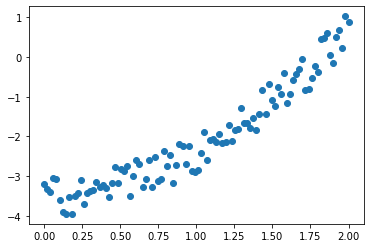

In [15]:
import numpy as np
x = np.linspace(0, 2, 100)
y = x**2 + .10*x - 4 + np.random.random(100)
plt.scatter(x, y)

In [16]:
%%latex
$$(y_i - (mx + b))^2$$

<IPython.core.display.Latex object>

In [17]:
%%latex
$$(y_i - (a + bx + cx^2))^2$$

<IPython.core.display.Latex object>

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
x.shape

(100,)

In [21]:
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [22]:
lr.coef_

array([2.08515558])

In [23]:
lr.intercept_

-4.122012696133952

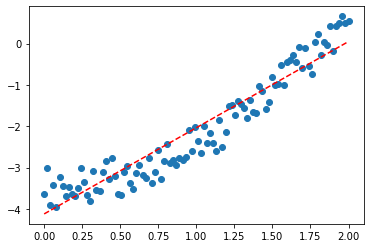

In [24]:
import numpy as np
x = np.linspace(0, 2, 100)
y = x**2 + .10*x - 4 + np.random.random(100)
plt.scatter(x, y)

def l(x):
    return lr.coef_*x + lr.intercept_

plt.plot(x, l(x), '--r')

In [25]:
x = x.reshape(-1, 1)
x2 = x**2
X = np.concatenate((x, x2), axis = 1)

In [27]:
lr2 = LinearRegression()
lr2.fit(X, y)

LinearRegression()

In [28]:
lr2.coef_

array([0.1728426 , 0.99066466])

In [30]:
X@lr2.coef_.T

array([0.00000000e+00, 3.89608145e-03, 8.60078624e-03, 1.41141144e-02,
       2.04360658e-02, 2.75666406e-02, 3.55058387e-02, 4.42536601e-02,
       5.38101049e-02, 6.41751730e-02, 7.53488645e-02, 8.73311793e-02,
       1.00122117e-01, 1.13721679e-01, 1.28129864e-01, 1.43346672e-01,
       1.59372103e-01, 1.76206158e-01, 1.93848836e-01, 2.12300137e-01,
       2.31560062e-01, 2.51628610e-01, 2.72505782e-01, 2.94191577e-01,
       3.16685995e-01, 3.39989036e-01, 3.64100701e-01, 3.89020989e-01,
       4.14749900e-01, 4.41287435e-01, 4.68633593e-01, 4.96788375e-01,
       5.25751780e-01, 5.55523808e-01, 5.86104459e-01, 6.17493734e-01,
       6.49691632e-01, 6.82698153e-01, 7.16513298e-01, 7.51137066e-01,
       7.86569458e-01, 8.22810472e-01, 8.59860111e-01, 8.97718372e-01,
       9.36385257e-01, 9.75860765e-01, 1.01614490e+00, 1.05723765e+00,
       1.09913903e+00, 1.14184903e+00, 1.18536766e+00, 1.22969490e+00,
       1.27483077e+00, 1.32077527e+00, 1.36752839e+00, 1.41509013e+00,
      

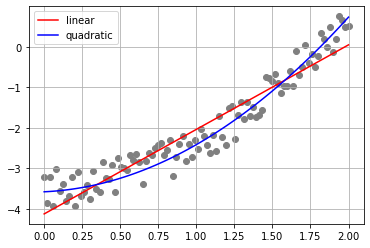

In [35]:
import numpy as np
x = np.linspace(0, 2, 100)
y = x**2 + .10*x - 4 + np.random.random(100)
plt.scatter(x, y, color = 'gray')

def l(x):
    return lr.coef_*x + lr.intercept_

plt.plot(x, l(x), '-r', label = 'linear')

def q(x):
    return x@lr2.coef_.T + lr2.intercept_

plt.plot(x, q(X), '-b', label = 'quadratic')
plt.legend()
plt.grid();

### Using PolynomialFeatures

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pfeatures = PolynomialFeatures()

In [39]:
x.shape

(100,)

In [41]:
x = x.reshape(-1, 1)
pfeatures.fit(x)

PolynomialFeatures()

In [43]:
x[:10]

array([[0.        ],
       [0.02020202],
       [0.04040404],
       [0.06060606],
       [0.08080808],
       [0.1010101 ],
       [0.12121212],
       [0.14141414],
       [0.16161616],
       [0.18181818]])

In [44]:
pfeatures.transform(x)[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.02020202e-02, 4.08121620e-04],
       [1.00000000e+00, 4.04040404e-02, 1.63248648e-03],
       [1.00000000e+00, 6.06060606e-02, 3.67309458e-03],
       [1.00000000e+00, 8.08080808e-02, 6.52994592e-03],
       [1.00000000e+00, 1.01010101e-01, 1.02030405e-02],
       [1.00000000e+00, 1.21212121e-01, 1.46923783e-02],
       [1.00000000e+00, 1.41414141e-01, 1.99979594e-02],
       [1.00000000e+00, 1.61616162e-01, 2.61197837e-02],
       [1.00000000e+00, 1.81818182e-01, 3.30578512e-02]])

### Using a Pipeline

In [45]:
from sklearn.pipeline import make_pipeline

In [46]:
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

In [47]:
pipe.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [48]:
pipe.predict(x)

array([-3.509201  , -3.50261375, -3.495307  , -3.48728077, -3.47853505,
       -3.46906983, -3.45888513, -3.44798093, -3.43635725, -3.42401408,
       -3.41095141, -3.39716925, -3.38266761, -3.36744647, -3.35150585,
       -3.33484573, -3.31746612, -3.29936703, -3.28054844, -3.26101036,
       -3.2407528 , -3.21977574, -3.19807919, -3.17566315, -3.15252762,
       -3.1286726 , -3.10409809, -3.07880409, -3.0527906 , -3.02605762,
       -2.99860515, -2.97043319, -2.94154174, -2.9119308 , -2.88160037,
       -2.85055045, -2.81878103, -2.78629213, -2.75308374, -2.71915586,
       -2.68450848, -2.64914162, -2.61305527, -2.57624942, -2.53872409,
       -2.50047926, -2.46151495, -2.42183114, -2.38142785, -2.34030506,
       -2.29846278, -2.25590102, -2.21261976, -2.16861901, -2.12389878,
       -2.07845905, -2.03229983, -1.98542112, -1.93782293, -1.88950524,
       -1.84046806, -1.79071139, -1.74023523, -1.68903958, -1.63712444,
       -1.58448981, -1.53113569, -1.47706208, -1.42226898, -1.36

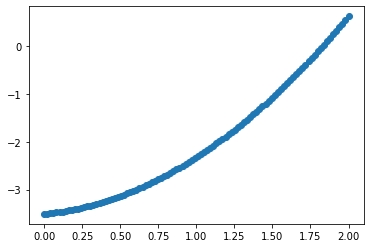

In [49]:
plt.scatter(x, pipe.predict(x))

### Cross-Validation

In [50]:
lr2

LinearRegression()

In [51]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(lr2, X, y)

array([-1.2564549 , -0.0667557 , -0.34409316,  0.530195  ,  0.5584407 ])